In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [99]:
df=pd.read_csv("tesla.csv")
df_raw=df.copy()
df_raw.head()

,Date,Open,High,Low,Close,Volume,Daily_Return,Price_Range,Price_Change,Price_Change_Percent,MA_7,MA_30,MA_90,Volatility_7d,Year,Month,Day_of_Week,Quarter
0,2010-06-29,1.27,1.67,1.17,1.59,281494500,NaN,0.50,0.32,25.20,NaN,NaN,NaN,NaN,2010,6,Tuesday,2
1,2010-06-30,1.72,2.03,1.55,1.59,257806500,0.0000,0.48,-0.13,-7.56,NaN,NaN,NaN,NaN,2010,6,Wednesday,2
2,2010-07-01,1.67,1.73,1.35,1.46,123282000,-0.0818,0.38,-0.21,-12.57,NaN,NaN,NaN,NaN,2010,7,Thursday,3
3,2010-07-02,1.53,1.54,1.25,1.28,77097000,-0.1233,0.29,-0.25,-16.34,NaN,NaN,NaN,NaN,2010,7,Friday,3
4,2010-07-06,1.33,1.33,1.06,1.07,103003500,-0.1641,0.27,-0.26,-19.55,NaN,NaN,NaN,NaN,2010,7,Tuesday,3


In [100]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3902 entries, 0 to 3901
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  3902 non-null   object 
 1   Open                  3902 non-null   float64
 2   High                  3902 non-null   float64
 3   Low                   3902 non-null   float64
 4   Close                 3902 non-null   float64
 5   Volume                3902 non-null   int64  
 6   Daily_Return          3901 non-null   float64
 7   Price_Range           3902 non-null   float64
 8   Price_Change          3902 non-null   float64
 9   Price_Change_Percent  3902 non-null   float64
 10  MA_7                  3896 non-null   float64
 11  MA_30                 3873 non-null   float64
 12  MA_90                 3813 non-null   float64
 13  Volatility_7d         3895 non-null   float64
 14  Year                  3902 non-null   int64  
 15  Month                

In [101]:
df_raw.dtypes

Date                     object
Open                    float64
High                    float64
Low                     float64
Close                   float64
Volume                    int64
Daily_Return            float64
Price_Range             float64
Price_Change            float64
Price_Change_Percent    float64
MA_7                    float64
MA_30                   float64
MA_90                   float64
Volatility_7d           float64
Year                      int64
Month                     int64
Day_of_Week              object
Quarter                   int64
dtype: object

In [102]:
df_raw.describe()

,Open,High,Low,Close,Volume,Daily_Return,Price_Range,Price_Change,Price_Change_Percent,MA_7,MA_30,MA_90,Volatility_7d,Year,Month,Quarter
count,3902.000000,3902.000000,3902.000000,3902.000000,3.902000e+03,3901.000000,3902.000000,3902.000000,3902.000000,3896.000000,3873.000000,3813.000000,3895.000000,3902.000000,3902.000000,3902.000000
mean,99.192455,101.366984,96.874457,99.172255,9.674288e+07,0.002107,4.492527,-0.020200,0.033355,98.968563,98.178962,96.301020,0.032052,2017.730138,6.641210,2.546643
std,125.388720,128.114452,122.412555,125.311597,7.570527e+07,0.036416,6.674235,4.973705,2.971433,124.814764,122.895196,118.352234,0.017171,4.481951,3.424421,1.113527
min,1.080000,1.110000,1.000000,1.050000,1.777500e+06,-0.210600,0.010000,-50.030000,-19.580000,1.150000,1.300000,1.350000,0.004900,2010.000000,1.000000,1.000000
25%,12.732500,12.970000,12.540000,12.800000,5.142075e+07,-0.016300,0.320000,-0.340000,-1.550000,12.857500,13.180000,13.760000,0.020400,2014.000000,4.000000,2.000000
50%,19.900000,20.305000,19.540000,19.925000,8.331105e+07,0.001000,0.690000,0.000000,0.000000,19.900000,19.950000,20.550000,0.028100,2018.000000,7.000000,3.000000
75%,208.107500,212.685000,202.570000,207.660000,1.211088e+08,0.019700,7.525000,0.340000,1.620000,208.627500,211.930000,213.230000,0.039100,2022.000000,10.000000,4.000000
max,489.880000,498.830000,485.330000,489.880000,9.140820e+08,0.244600,61.530000,47.510000,25.200000,483.060000,447.960000,426.800000,0.142600,2025.000000,12.000000,4.000000


In [103]:
df_raw.describe(include="O")

,Date,Day_of_Week
count,3902,3902
unique,3902,5
top,2025-12-31,Tuesday
freq,1,803


In [104]:
num_cols=df_raw.select_dtypes(["float64","int64"]).columns
cat_cols=df_raw.select_dtypes(["category","object"]).columns

print(num_cols)
print(cat_cols)

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Daily_Return', 'Price_Range',
       'Price_Change', 'Price_Change_Percent', 'MA_7', 'MA_30', 'MA_90',
       'Volatility_7d', 'Year', 'Month', 'Quarter'],
      dtype='object')
Index(['Date', 'Day_of_Week'], dtype='object')


In [105]:
print(df_raw.isna().sum()/len(df_raw))

Date                    0.000000
Open                    0.000000
High                    0.000000
Low                     0.000000
Close                   0.000000
Volume                  0.000000
Daily_Return            0.000256
Price_Range             0.000000
Price_Change            0.000000
Price_Change_Percent    0.000000
MA_7                    0.001538
MA_30                   0.007432
MA_90                   0.022809
Volatility_7d           0.001794
Year                    0.000000
Month                   0.000000
Day_of_Week             0.000000
Quarter                 0.000000
dtype: float64


In [106]:
df_raw.dropna(inplace=True)

In [107]:
print(df_raw.isna().sum()/len(df_raw))

Date                    0.0
Open                    0.0
High                    0.0
Low                     0.0
Close                   0.0
Volume                  0.0
Daily_Return            0.0
Price_Range             0.0
Price_Change            0.0
Price_Change_Percent    0.0
MA_7                    0.0
MA_30                   0.0
MA_90                   0.0
Volatility_7d           0.0
Year                    0.0
Month                   0.0
Day_of_Week             0.0
Quarter                 0.0
dtype: float64


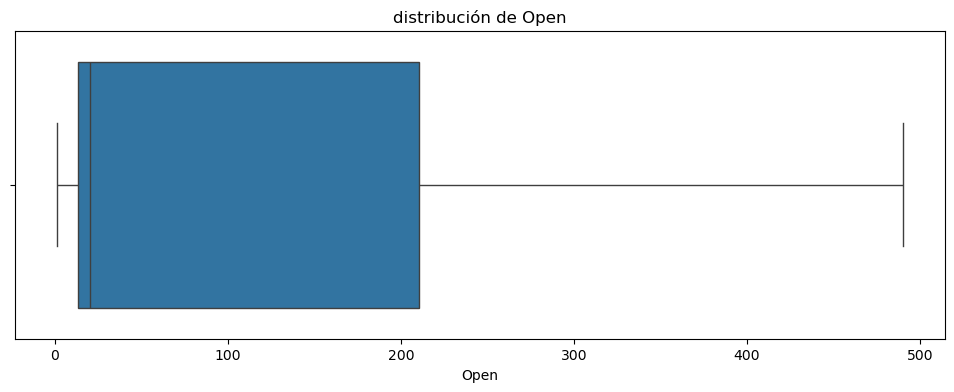

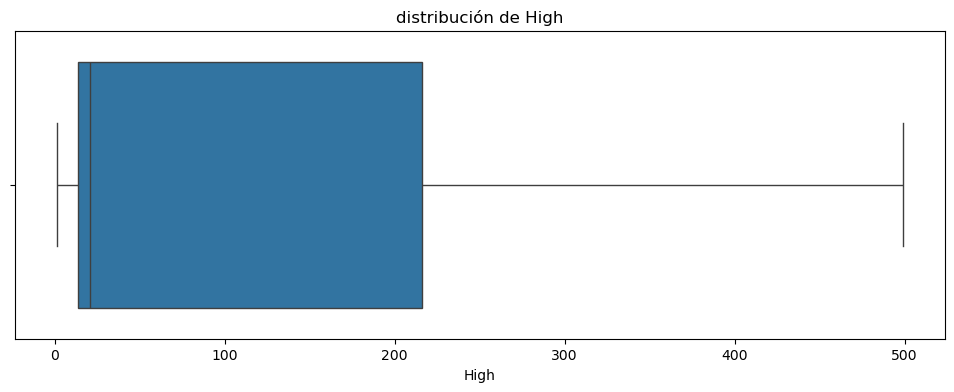

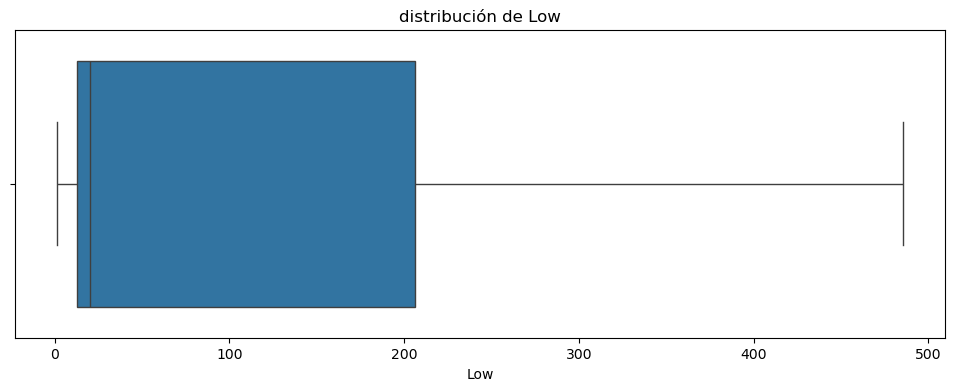

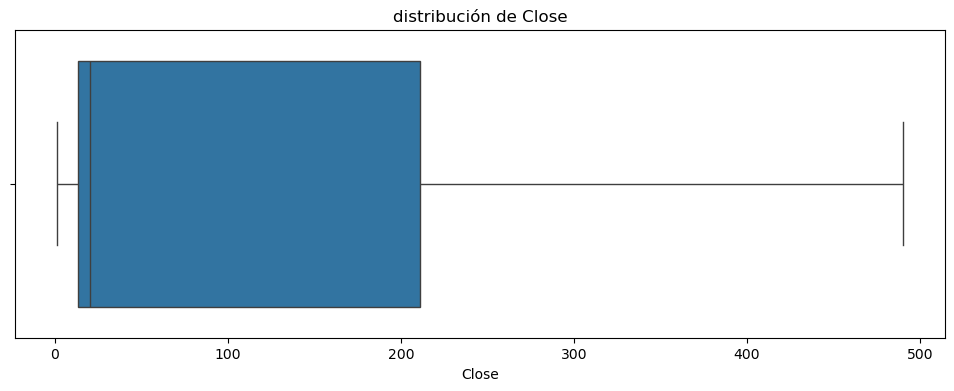

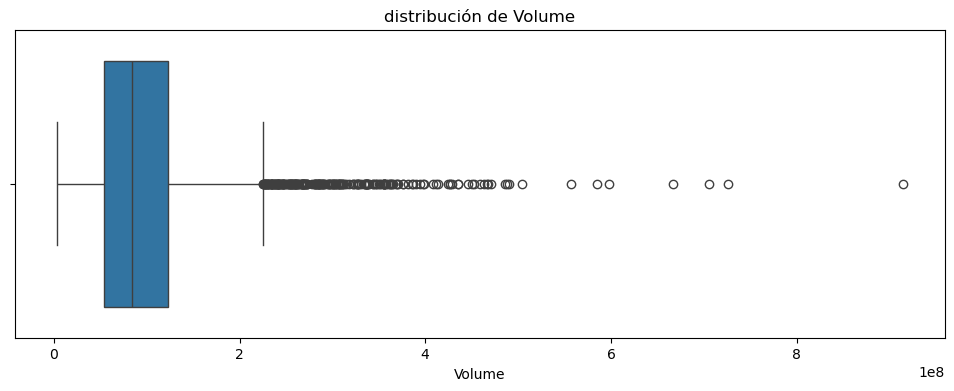

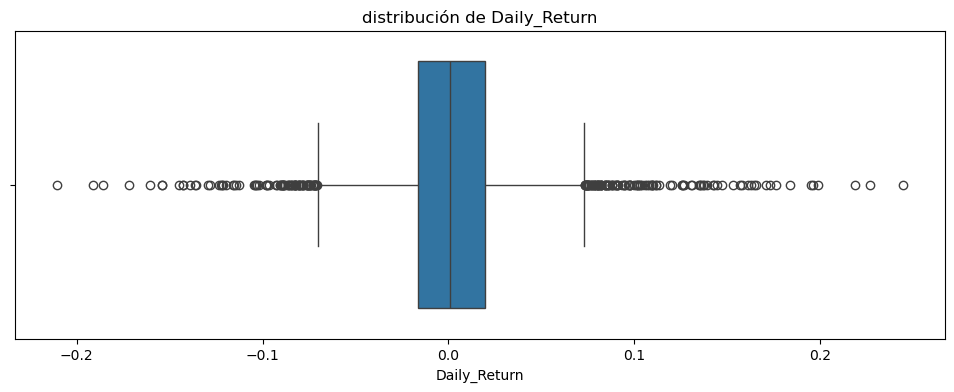

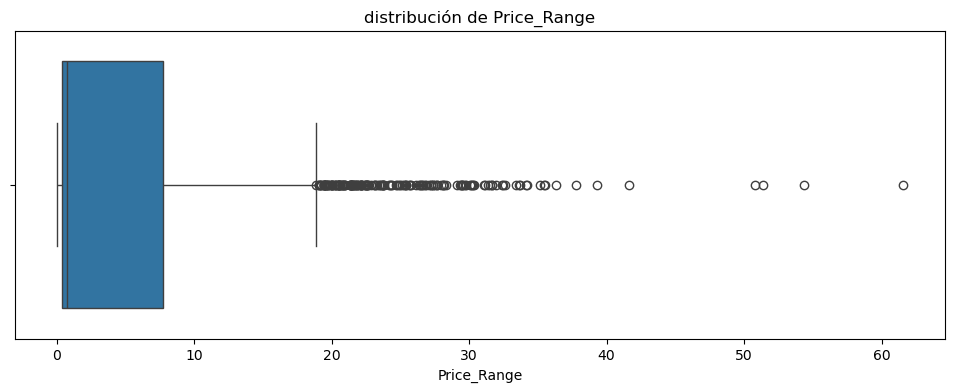

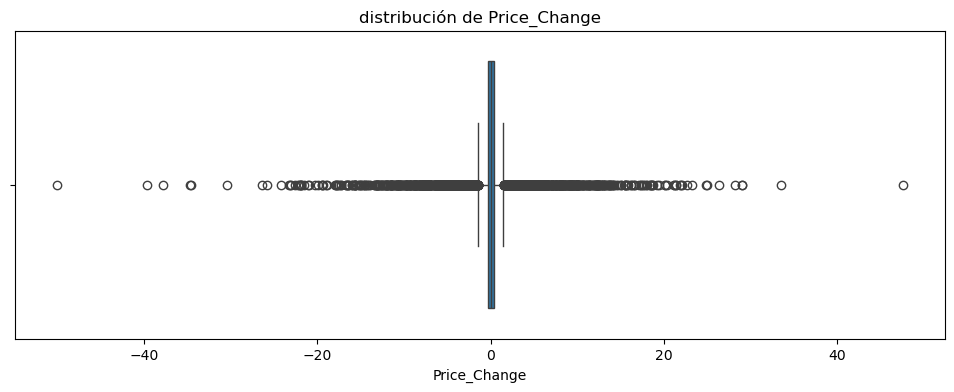

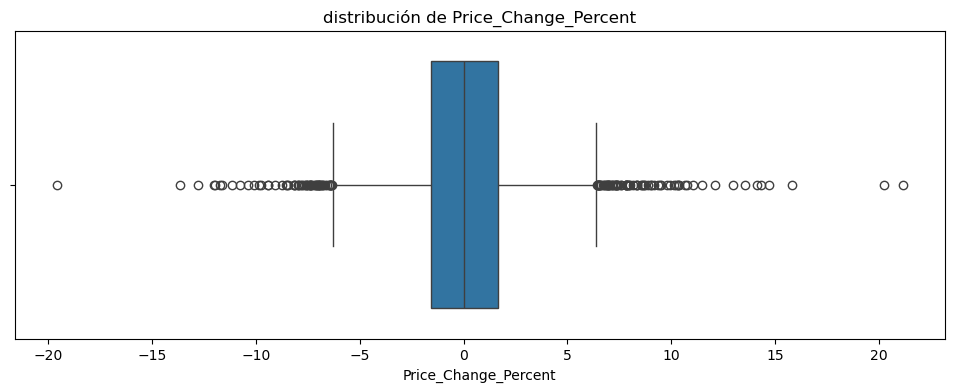

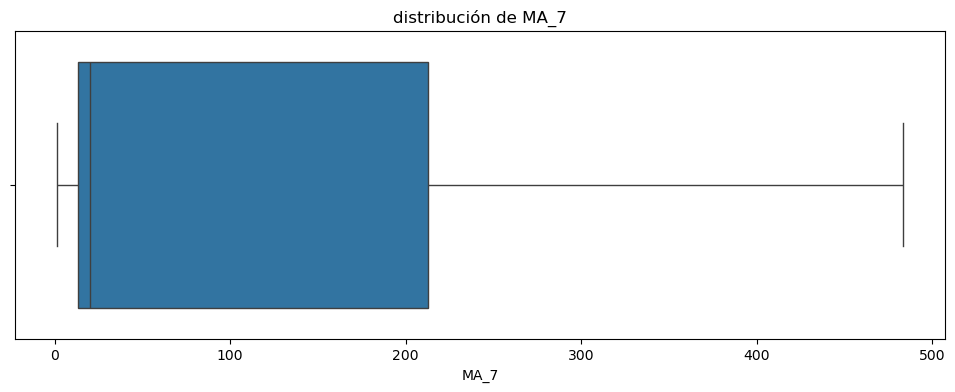

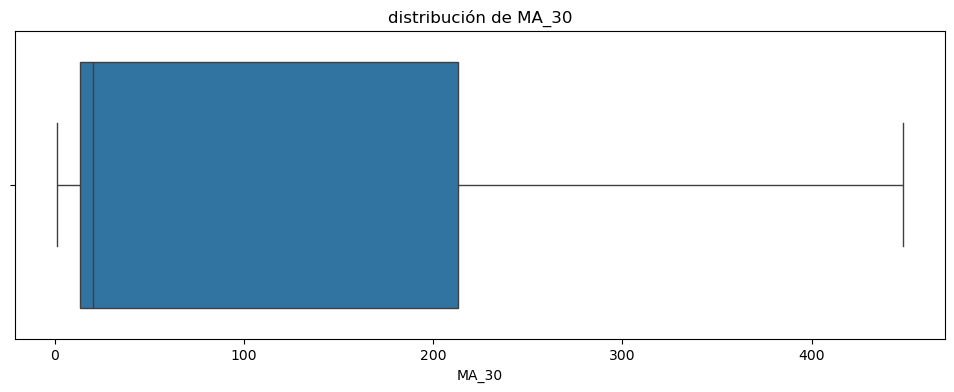

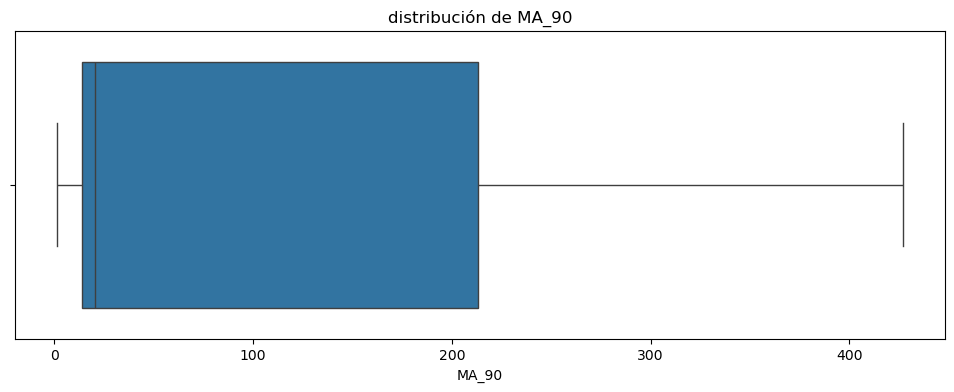

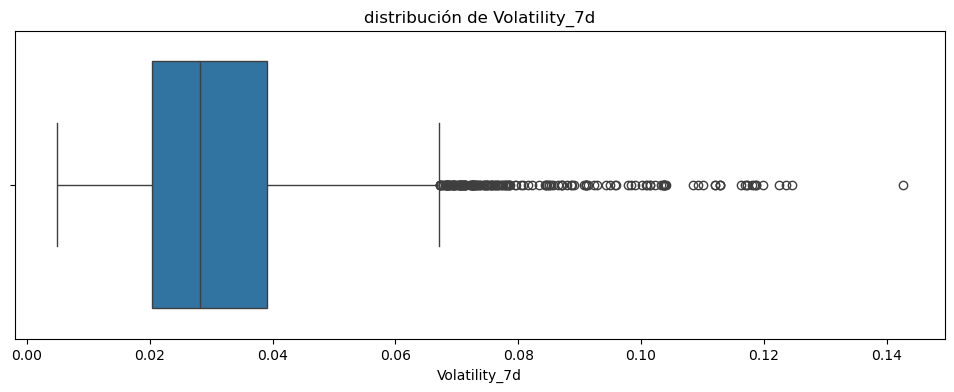

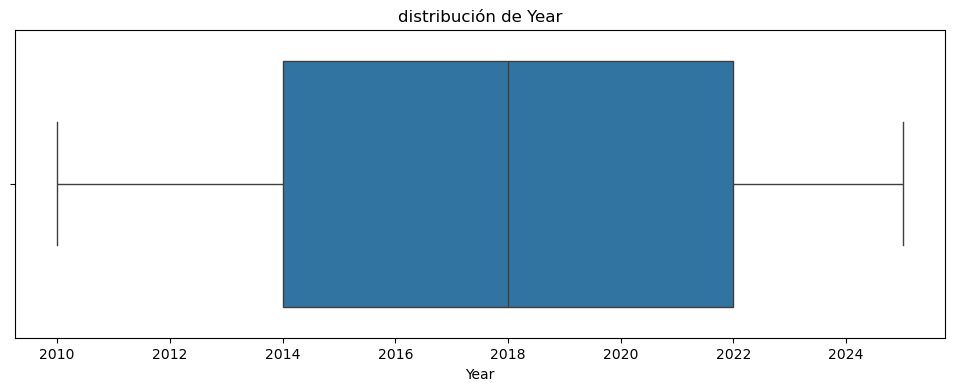

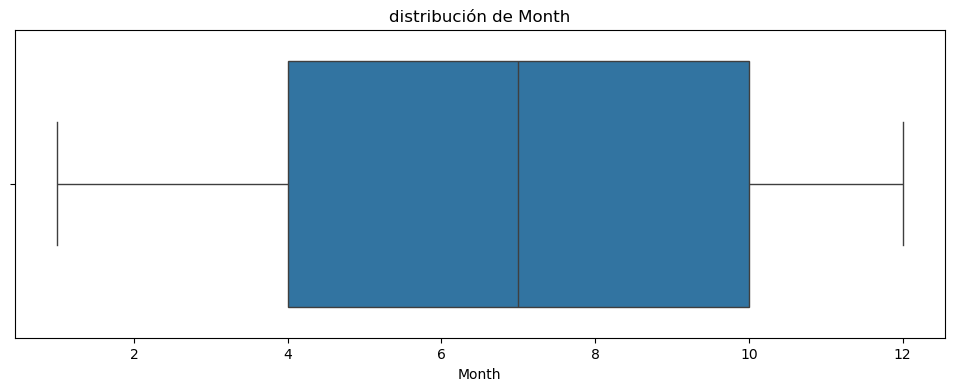

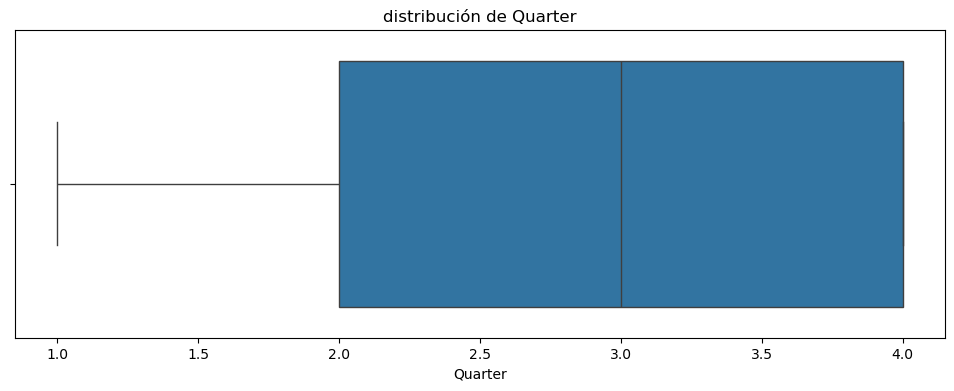

In [108]:
for col in num_cols:
    plt.figure(figsize=(12,4))
    sns.boxplot(x=df_raw[col])
    plt.title(f"distribución de {col}")
    plt.show()

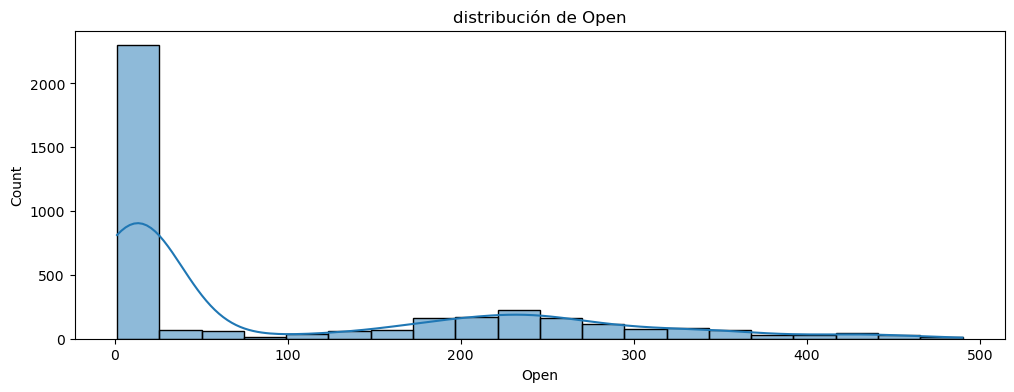

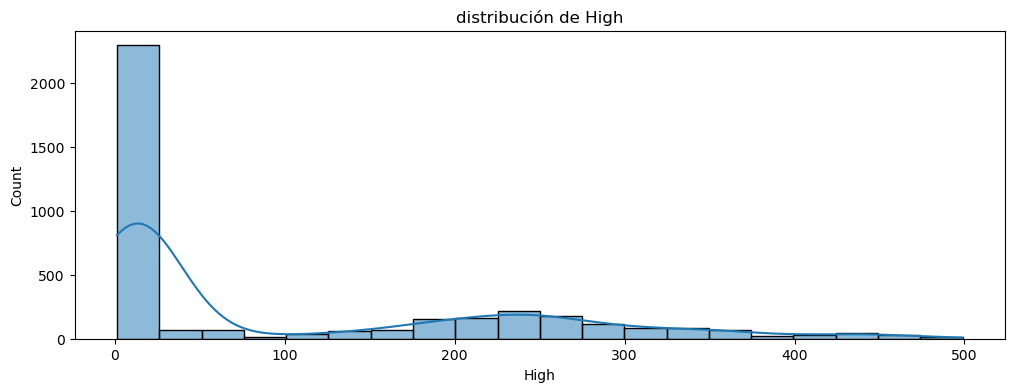

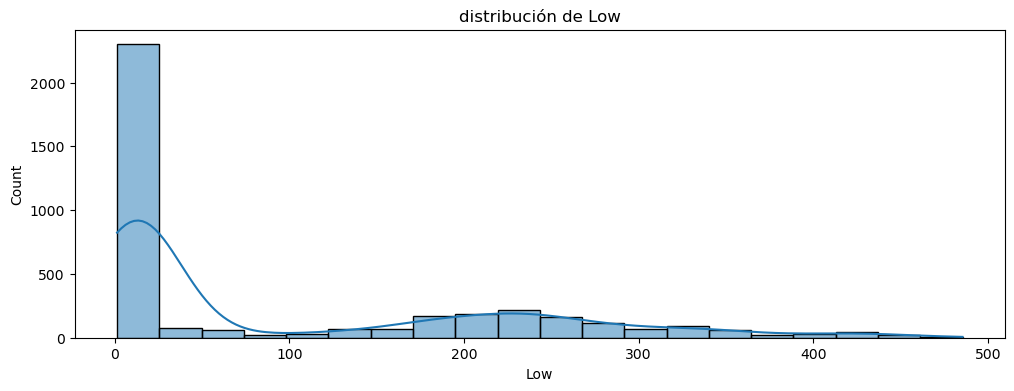

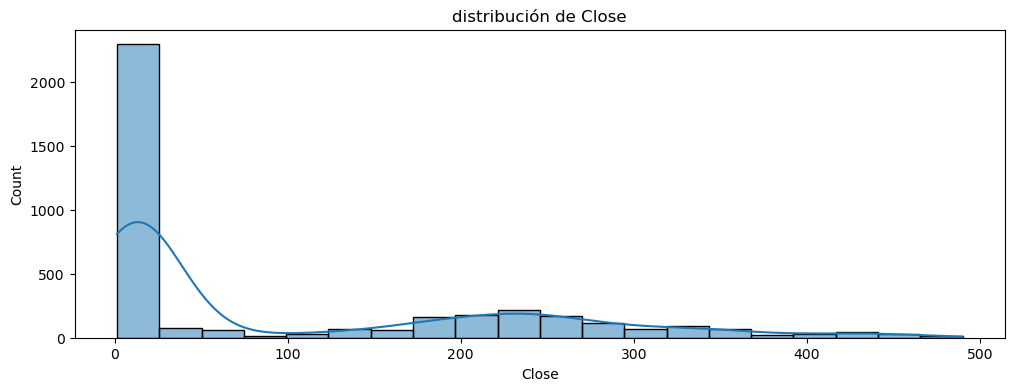

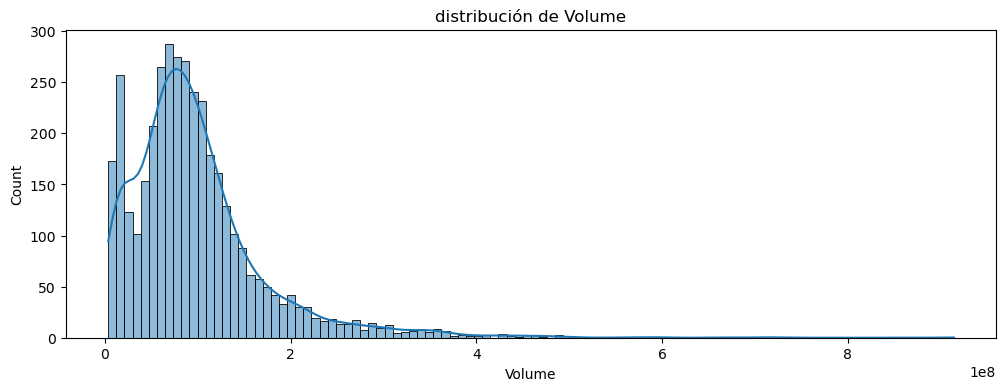

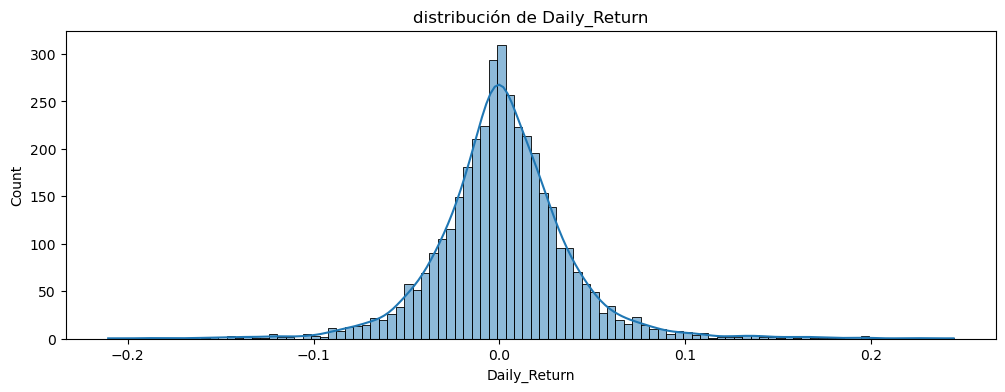

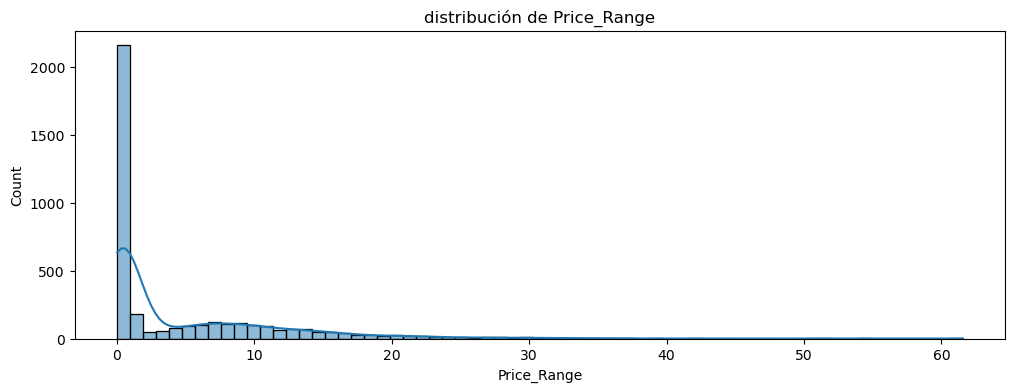

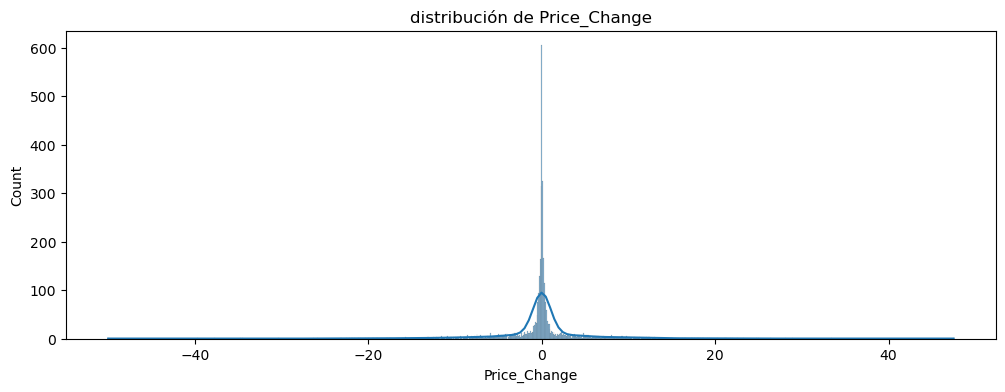

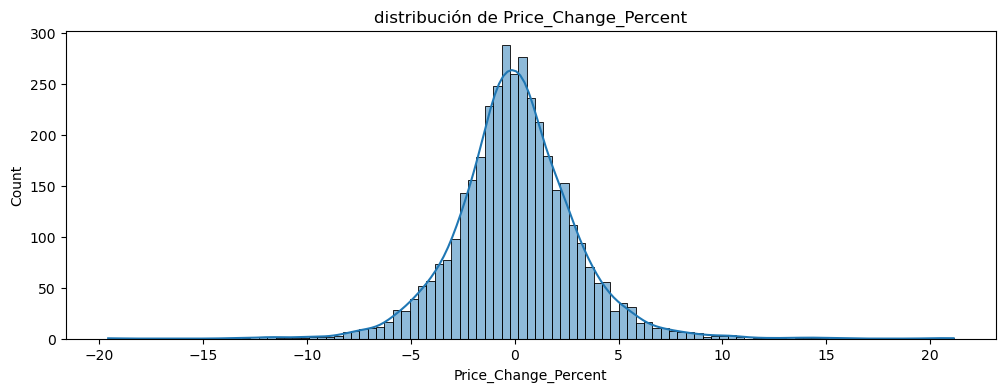

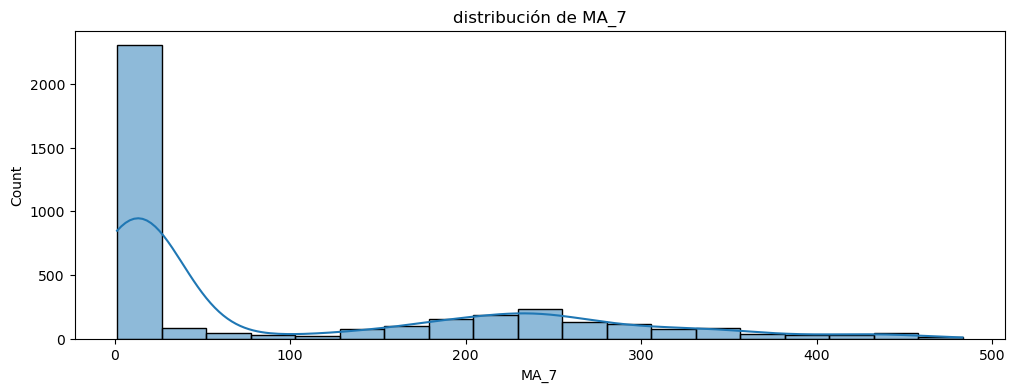

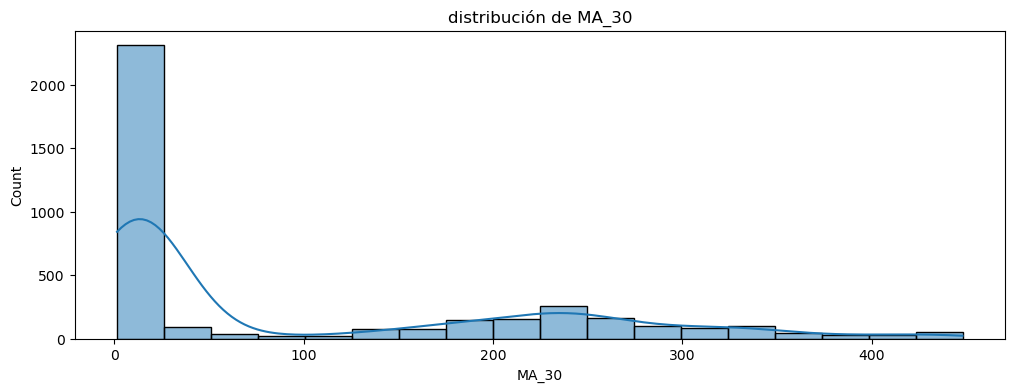

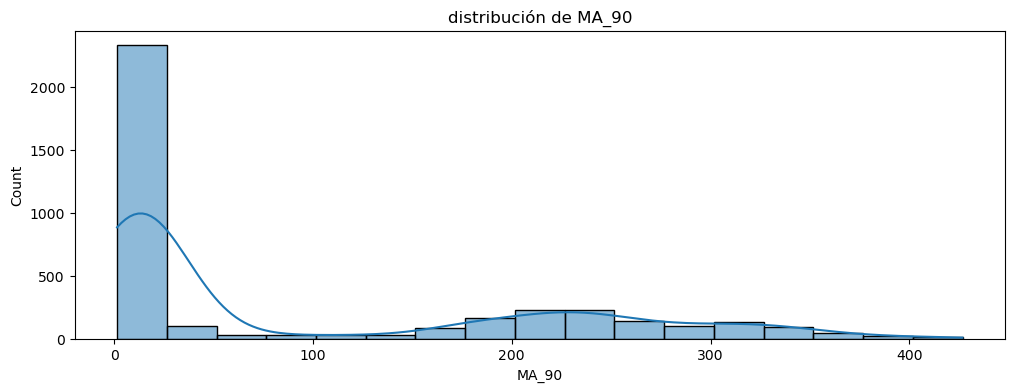

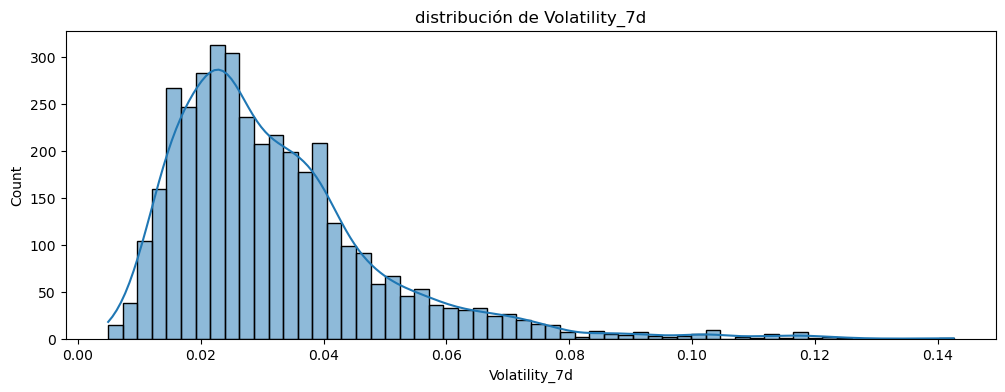

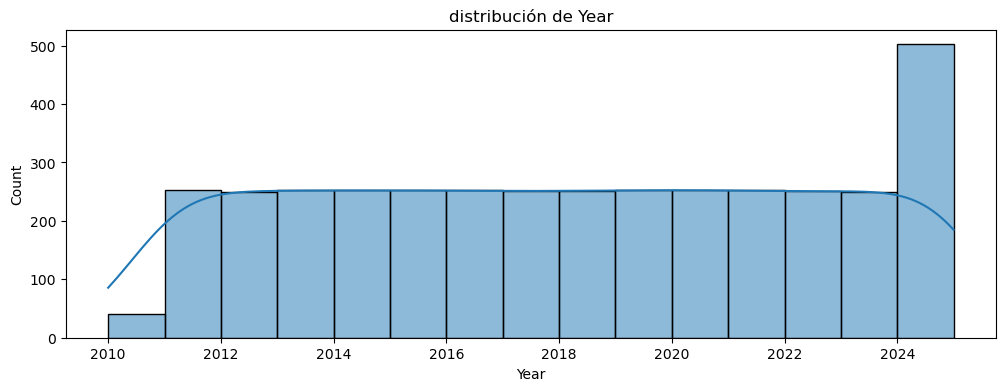

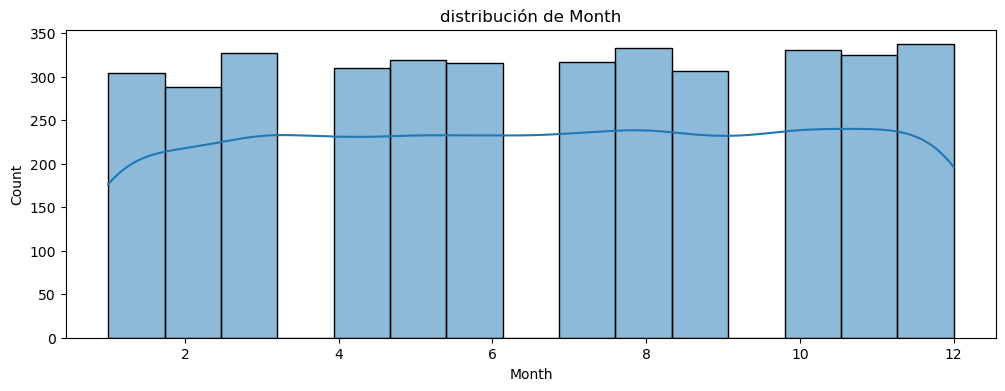

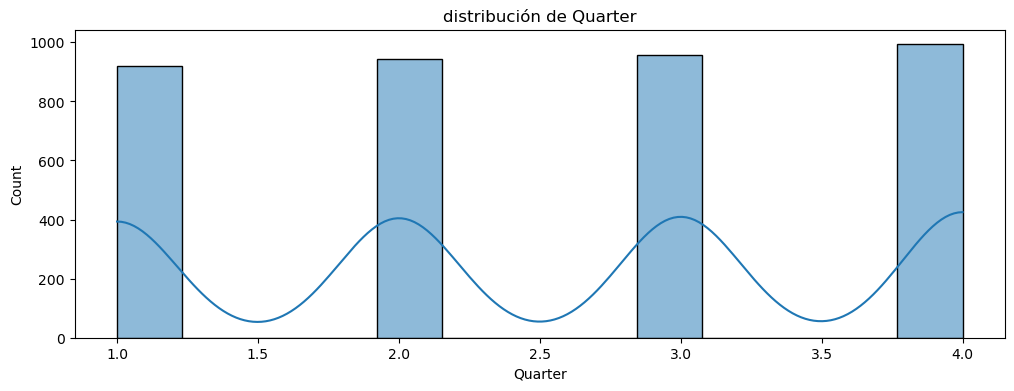

In [109]:
for col in num_cols:
    plt.figure(figsize=(12,4))
    sns.histplot(x=df_raw[col], kde=True)
    plt.title(f"distribución de {col}")
    plt.show()

In [110]:
Q1= df_raw[num_cols].quantile(0.25)
Q3= df_raw[num_cols].quantile(0.75)

IQR= Q3-Q1

upper=Q3 + 1.5 * IQR
lower=Q1 - 1.5 * IQR

outliers=(df_raw[num_cols]>upper) | (df_raw[num_cols]<lower)
print(outliers.sum()/len(df_raw))

Open                    0.000000
High                    0.000000
Low                     0.000000
Close                   0.000000
Volume                  0.057697
Daily_Return            0.052977
Price_Range             0.044847
Price_Change            0.310779
Price_Change_Percent    0.036454
MA_7                    0.000000
MA_30                   0.000000
MA_90                   0.000000
Volatility_7d           0.045109
Year                    0.000000
Month                   0.000000
Quarter                 0.000000
dtype: float64


In [111]:
rbsc_cols=['Volume','Daily_Return','Price_Range','Price_Change','Price_Change_Percent','Volatility_7d']
mmsc_cols=['Month','Quarter','Year']
stdsc_cols=num_cols.drop(rbsc_cols + mmsc_cols)
print(stdsc_cols)
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

rbScaler=RobustScaler()
stdScaler=StandardScaler()
mmScaler=MinMaxScaler()

df_raw[rbsc_cols]=rbScaler.fit_transform(df_raw[rbsc_cols])
df_raw[mmsc_cols]=mmScaler.fit_transform(df_raw[mmsc_cols])
df_raw[stdsc_cols]=stdScaler.fit_transform(df_raw[stdsc_cols])

df_raw.head()


Index(['Open', 'High', 'Low', 'Close', 'MA_7', 'MA_30', 'MA_90'], dtype='object')


,Date,Open,High,Low,Close,Volume,Daily_Return,Price_Range,Price_Change,Price_Change_Percent,MA_7,MA_30,MA_90,Volatility_7d,Year,Month,Day_of_Week,Quarter
89,2010-11-03,-0.794582,-0.794346,-0.794700,-0.794676,-1.152448,0.557103,-0.085135,0.041096,0.663522,-0.795358,-0.797761,-0.802380,-0.385027,0.0,0.909091,Wednesday,1.0
90,2010-11-04,-0.793868,-0.792869,-0.794131,-0.793007,-0.823259,4.002786,-0.068919,0.205479,3.122642,-0.795118,-0.797680,-0.802380,1.540107,0.0,0.909091,Thursday,1.0
91,2010-11-05,-0.792676,-0.793102,-0.793317,-0.793246,-1.012476,-0.534819,-0.086486,-0.041096,-0.569182,-0.794879,-0.797599,-0.802380,1.561497,0.0,0.909091,Friday,1.0
92,2010-11-08,-0.792915,-0.793025,-0.793155,-0.792928,-1.122432,0.651811,-0.087838,0.054795,0.770440,-0.794560,-0.797518,-0.802380,1.540107,0.0,0.909091,Monday,1.0
93,2010-11-09,-0.792597,-0.792714,-0.793155,-0.793166,-1.024447,-0.532033,-0.082432,-0.041096,-0.566038,-0.794320,-0.797518,-0.802296,1.647059,0.0,0.909091,Tuesday,1.0


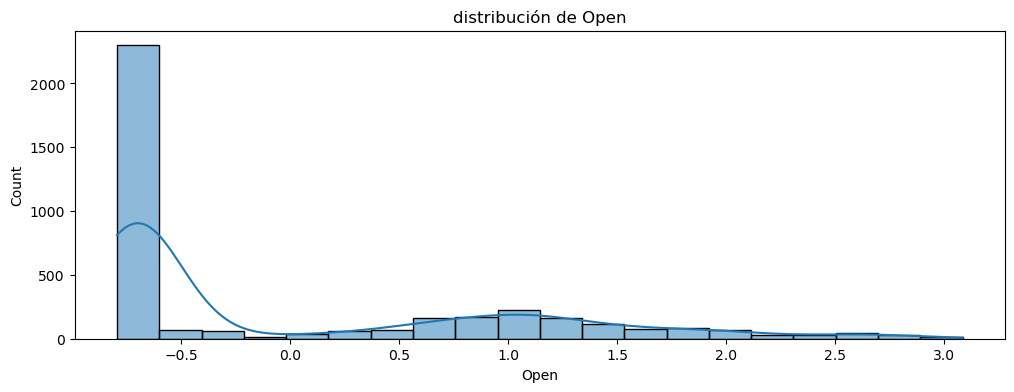

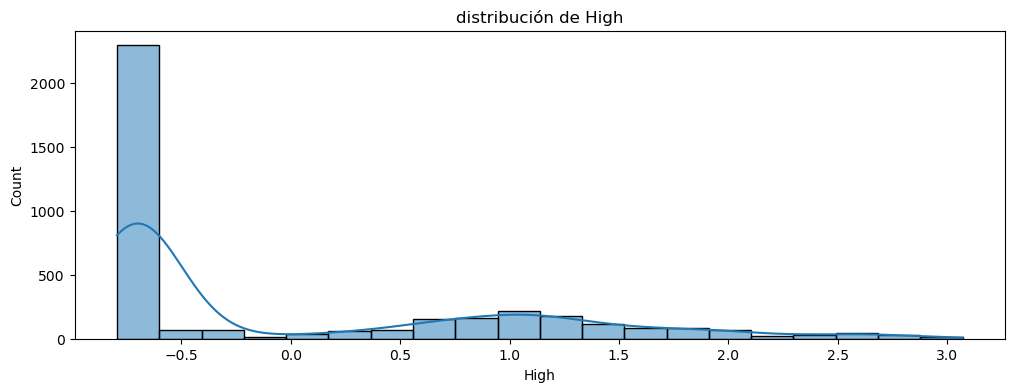

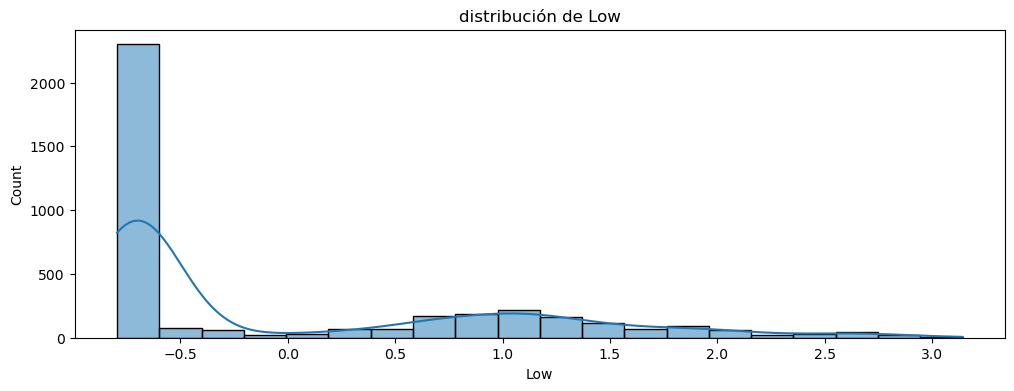

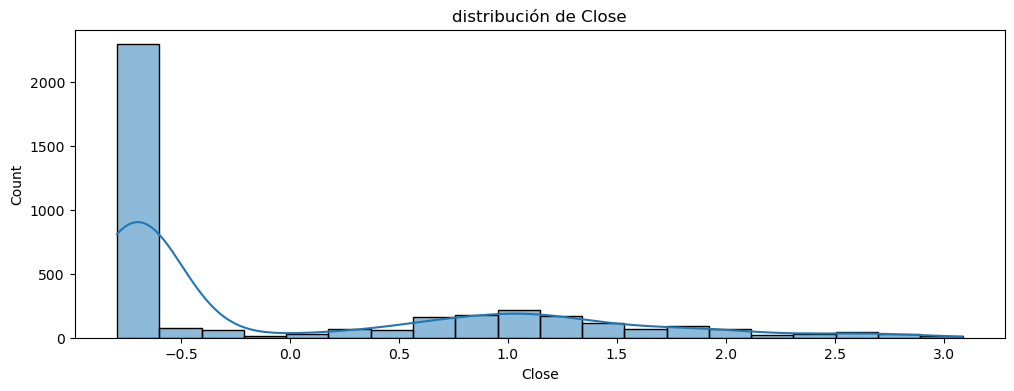

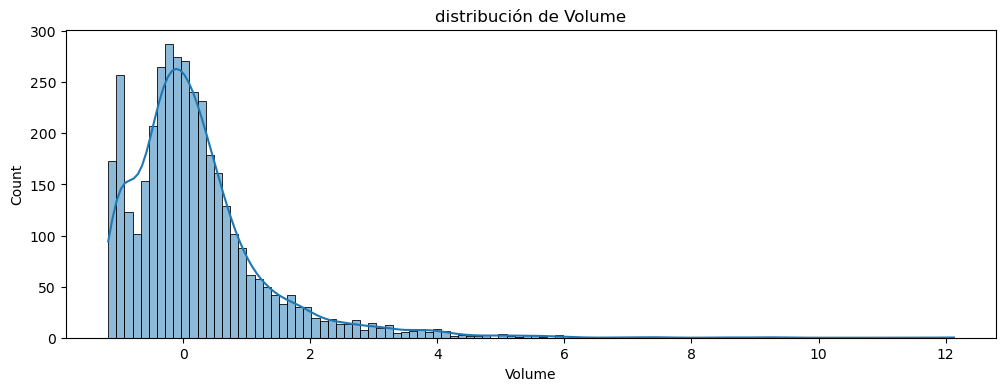

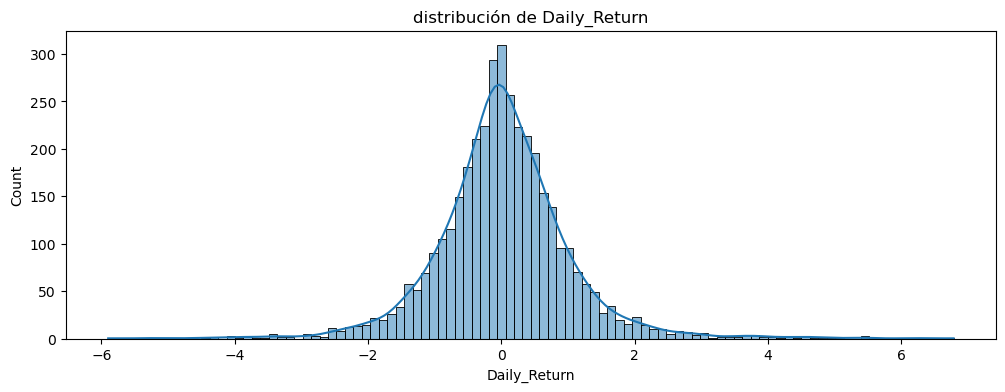

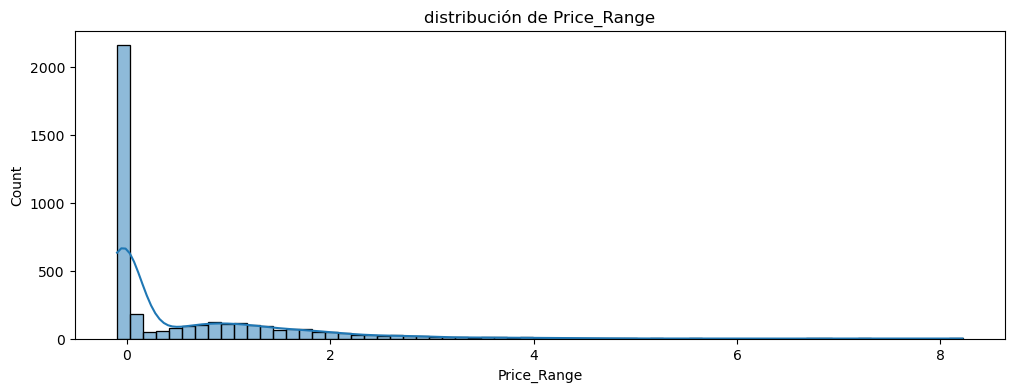

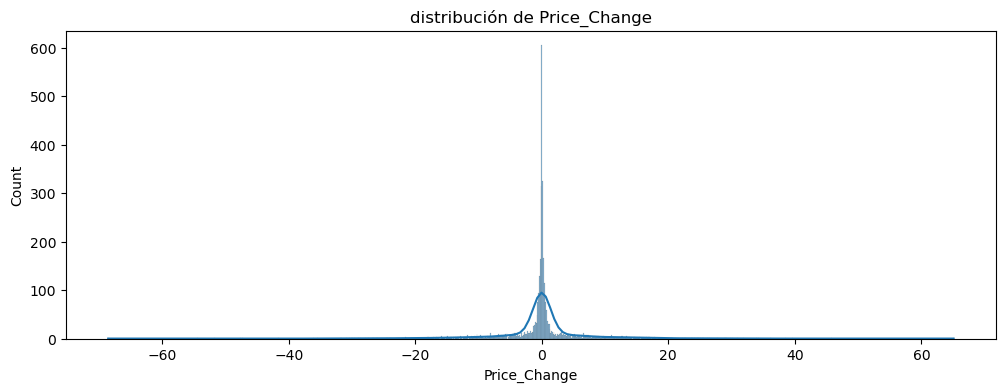

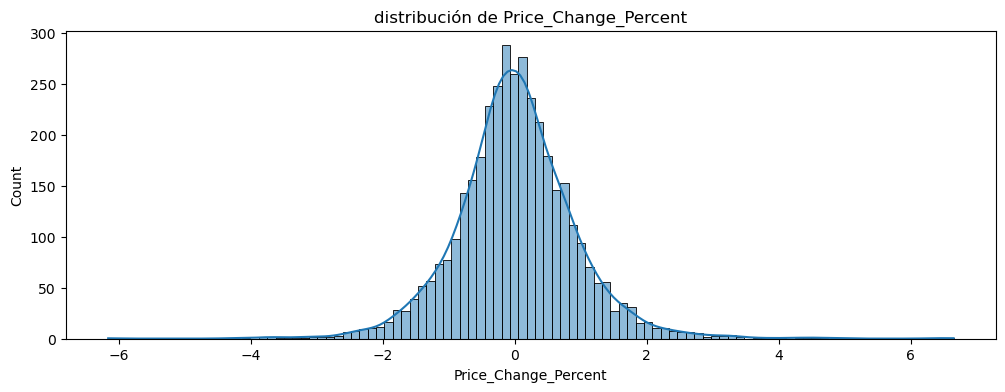

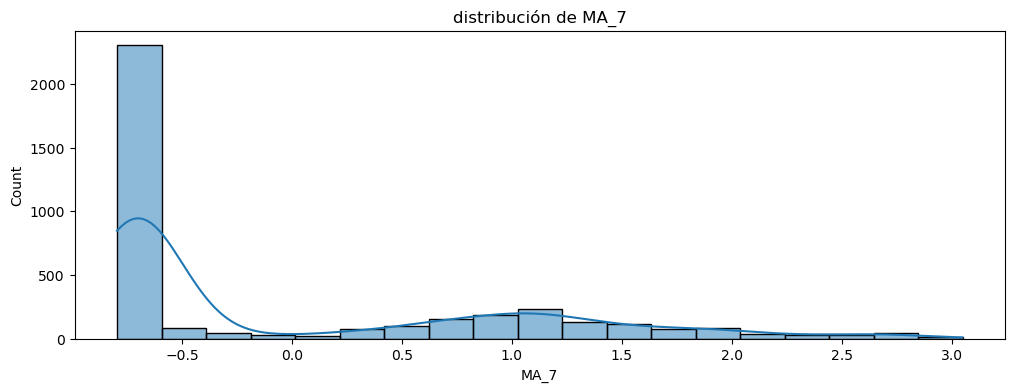

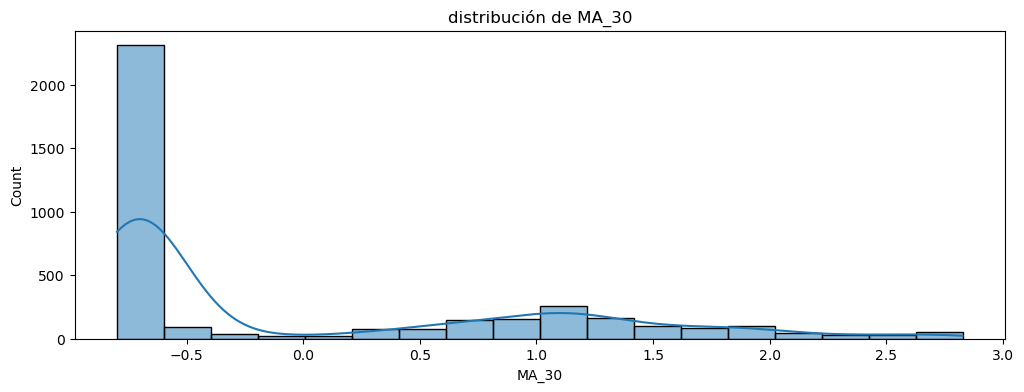

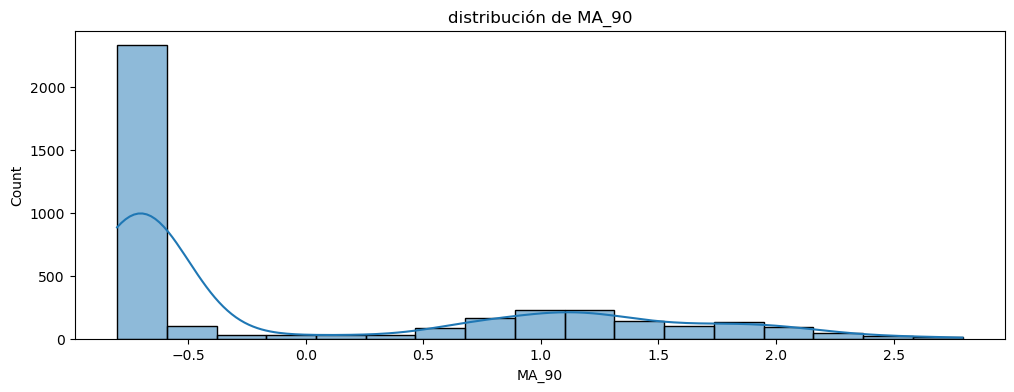

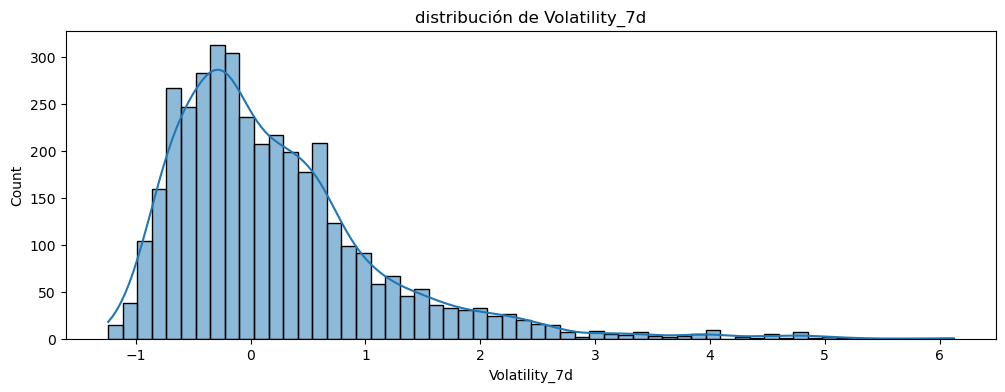

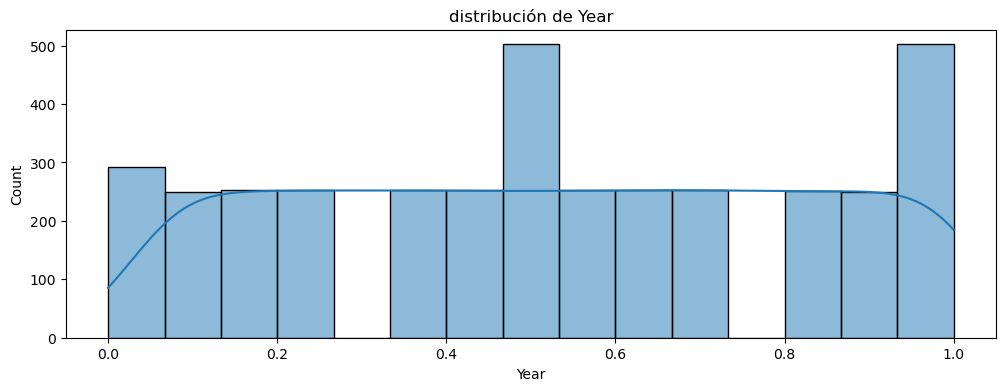

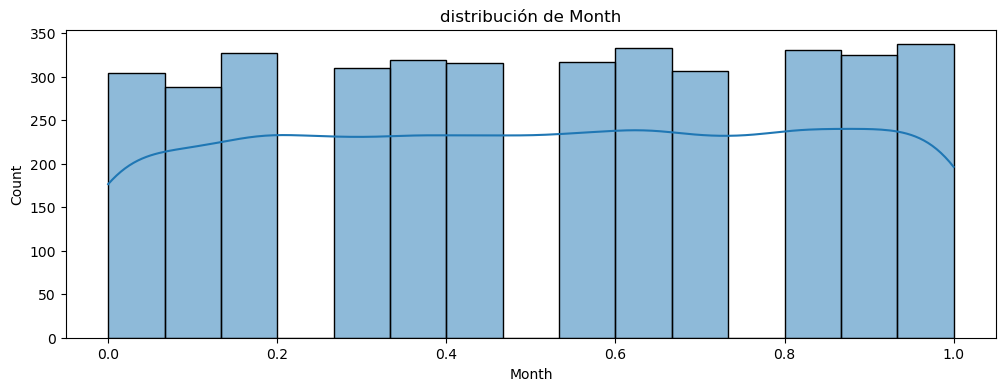

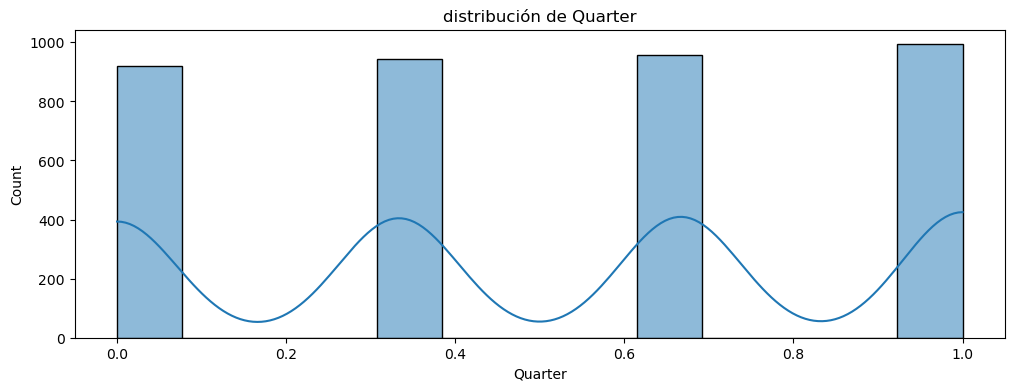

In [112]:
for col in num_cols:
    plt.figure(figsize=(12,4))
    sns.histplot(x=df_raw[col], kde=True)
    plt.title(f"distribución de {col}")
    plt.show()

In [113]:
from sklearn.model_selection import train_test_split

y=df_raw['Volume']
x=df_raw.drop(columns=['Volume','Date'])

x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.2 , random_state=42)

In [114]:
x_train=pd.get_dummies(x_train, columns=["Day_of_Week"], drop_first=True)
x_test=pd.get_dummies(x_test, columns=["Day_of_Week"], drop_first=True)
x_train.head()

,Open,High,Low,Close,Daily_Return,Price_Range,Price_Change,Price_Change_Percent,MA_7,MA_30,MA_90,Volatility_7d,Year,Month,Quarter,Day_of_Week_Monday,Day_of_Week_Thursday,Day_of_Week_Tuesday,Day_of_Week_Wednesday
1467,-0.672047,-0.673873,-0.670893,-0.673018,-0.295265,-0.047297,-0.123288,-0.166667,-0.673257,-0.677342,-0.693961,-0.652406,0.400000,0.272727,0.333333,False,False,False,True
1323,-0.672444,-0.675195,-0.674716,-0.674607,0.172702,-0.006757,-0.328767,-0.449686,-0.671103,-0.674826,-0.670046,-0.673797,0.333333,0.727273,0.666667,False,False,False,True
2939,1.502777,1.490670,1.483043,1.524457,0.470752,1.804054,3.547945,0.279874,1.401492,1.605194,2.027342,1.160428,0.800000,0.181818,0.000000,False,False,False,True
3206,0.716105,0.689100,0.716203,0.706860,-0.292479,0.606757,-1.698630,-0.204403,0.696821,0.758199,0.617974,0.449198,0.866667,0.181818,0.000000,False,False,False,False
2791,0.972373,1.001163,1.007825,1.014065,0.376045,1.187838,7.054795,0.723270,0.943815,0.973234,1.022666,-0.283422,0.733333,0.545455,0.666667,False,False,False,False


In [115]:
print(x_train.shape)
print(y_train.shape)

(3050, 19)
(3050,)


In [117]:
from sklearn.ensemble import RandomForestRegressor

rdmforest=RandomForestRegressor(n_jobs=-1, random_state=42)

rdmforest.fit(x_train,y_train)
print(rdmforest.score(x_test,y_test))

0.8185971921736837
